In [4]:
import pandas as pd
# file name 합치기
from glob import glob
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from sklearn.model_selection import train_test_split
# 시각화
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from skimage import io, feature
from skimage.transform import resize
import cv2
from PIL import ImageChops


In [5]:
import seaborn as sns

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

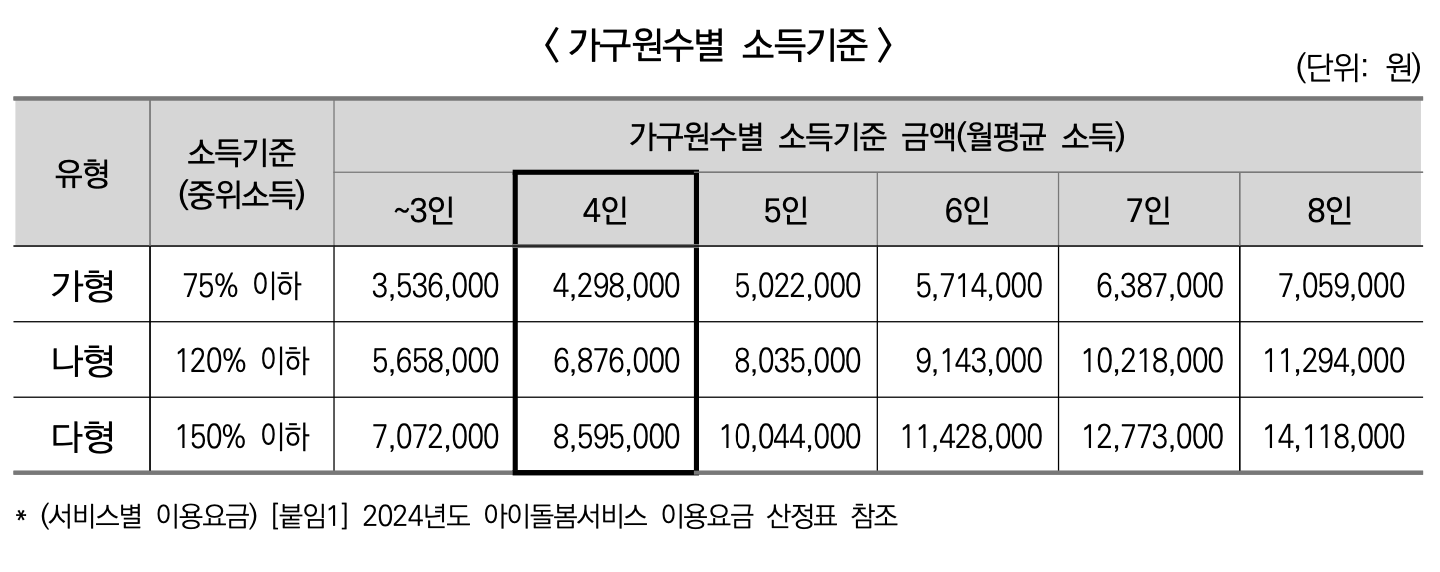

In [6]:
Image.open("./사진/스크린샷 2024-08-19 오전 10.17.31.png")

## 정보
- 라형 : 중위소득의 150% , 양육공백 x

In [7]:
면접항목 = pd.read_excel("./데이터파일/여성가족부_아이돌보미 면접 평가 표준 항목_20210817.xlsx")
서비스별 = pd.read_excel("./데이터파일/여성가족부_아이돌보미 현황 서비스별 정보 서비스_20240611.xlsx")
성별별 = pd.read_excel("./데이터파일/여성가족부_아이돌보미 현황 성별 정보 서비스_20240611.xlsx")
연령별 = pd.read_excel("./데이터파일/여성가족부_아이돌보미 현황 연령대별 정보 서비스_20240611.xlsx")
자격증소지 = pd.read_excel("./데이터파일/여성가족부_아이돌보미 현황 정보 서비스_20240611.xlsx")
가정별 = pd.read_excel("./데이터파일/여성가족부_아이돌봄 누적가정실적현황 정보 서비스_20240612.xlsx")
아이연령별 = pd.read_excel("./데이터파일/여성가족부_아이돌봄 누적아동실적현황 연령별 정보 서비스_20240612.xlsx")

In [8]:
소득별아동수 = pd.read_excel("./데이터파일/여성가족부_아이돌봄 누적아동실적현황 정보 서비스_20240612.xlsx")

In [9]:
가정별실적 = pd.read_excel("./데이터파일/여성가족부_아이돌봄 누적가정실적현황-가정유형소득기준별 정보 서비스_20240715.xlsx")

In [10]:
서비스별.head()

,기준연월,아이돌봄기관번호,아이돌봄기관명,상위아이돌봄기관번호,상위아이돌봄기관명,서비스총돌보미수,시간제돌보미수,영아종일제돌보미수,종합형돌보미수,질병아동돌보미수,기관연계돌보미수,데이터기준일자
0,202001,C0421,(사)순천YWCA,C0505,전라남도 광역거점,139,135,20,0,10,0,20240611
1,202001,C0383,강원 강릉시 강릉어린이집연합회,C0500,강원도 광역거점,110,100,35,0,12,0,20240611
2,202001,C0384,강원 고성군 건강가정지원센터,C0500,강원도 광역거점,15,15,0,0,0,0,20240611
3,202001,C0385,강원 동해시 건강가정.다문화가족지원센터,C0500,강원도 광역거점,56,56,1,1,5,0,20240611
4,202001,C0387,강원 속초시 가족센터,C0500,강원도 광역거점,51,50,3,4,2,0,20240611


In [11]:
서비스별.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11770 entries, 0 to 11769
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   기준연월        11770 non-null  int64 
 1   아이돌봄기관번호    11770 non-null  object
 2   아이돌봄기관명     11770 non-null  object
 3   상위아이돌봄기관번호  11770 non-null  object
 4   상위아이돌봄기관명   11770 non-null  object
 5   서비스총돌보미수    11770 non-null  int64 
 6   시간제돌보미수     11770 non-null  int64 
 7   영아종일제돌보미수   11770 non-null  int64 
 8   종합형돌보미수     11770 non-null  int64 
 9   질병아동돌보미수    11770 non-null  int64 
 10  기관연계돌보미수    11770 non-null  int64 
 11  데이터기준일자     11770 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.1+ MB


In [12]:
서비스별.describe()

,기준연월,서비스총돌보미수,시간제돌보미수,영아종일제돌보미수,종합형돌보미수,질병아동돌보미수,기관연계돌보미수,데이터기준일자
count,11770.000000,11770.000000,11770.000000,11770.000000,11770.000000,11770.000000,11770.000000,11770.0
mean,202176.201954,108.289550,104.594562,14.510450,4.801954,9.117162,3.415123,20240611.0
std,125.747412,79.077672,76.810767,14.833162,10.753597,12.927550,8.049119,0.0
min,202001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20240611.0
25%,202102.000000,32.000000,32.000000,3.000000,0.000000,1.000000,0.000000,20240611.0
50%,202203.000000,98.000000,95.000000,10.000000,1.000000,4.000000,0.000000,20240611.0
75%,202304.000000,163.000000,157.000000,21.000000,6.000000,12.000000,3.000000,20240611.0
max,202404.000000,377.000000,366.000000,107.000000,156.000000,109.000000,105.000000,20240611.0


In [13]:
서비스별_서비스지역배열 = 서비스별['상위아이돌봄기관명'].unique()
len(서비스별_서비스지역배열)

17

In [14]:
서비스별_전남 = 서비스별[서비스별['상위아이돌봄기관명'] == 서비스별_서비스지역배열[0]]

In [15]:
서비스별_전남_지사배열 = 서비스별_전남['아이돌봄기관명'].unique()

In [16]:
서비스별_전남_지사배열[1]

'목포시가족센터'

In [17]:
목포시가족센터 = 서비스별[서비스별['아이돌봄기관명'] == 서비스별_전남_지사배열[0]]

In [18]:
목포시가족센터.tail(1).iloc[:,5:11]

,서비스총돌보미수,시간제돌보미수,영아종일제돌보미수,종합형돌보미수,질병아동돌보미수,기관연계돌보미수
11542,166,166,3,3,36,0


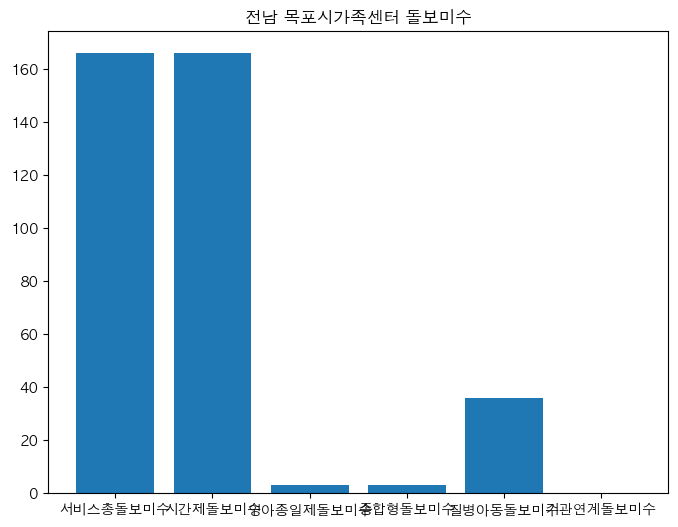

In [19]:
# 마지막 행의 6번째부터 11번째 열까지 선택
data_to_plot = 목포시가족센터.tail(1).iloc[:, 5:11]

# 막대그래프 생성
fig, ax = plt.subplots(figsize=(8, 6))

# x축 레이블 설정
x_labels = data_to_plot.columns

# 막대그래프 그리기
ax.bar(x_labels, data_to_plot.iloc[0])
ax.set_title('전남 목포시가족센터 돌보미수')
plt.show()

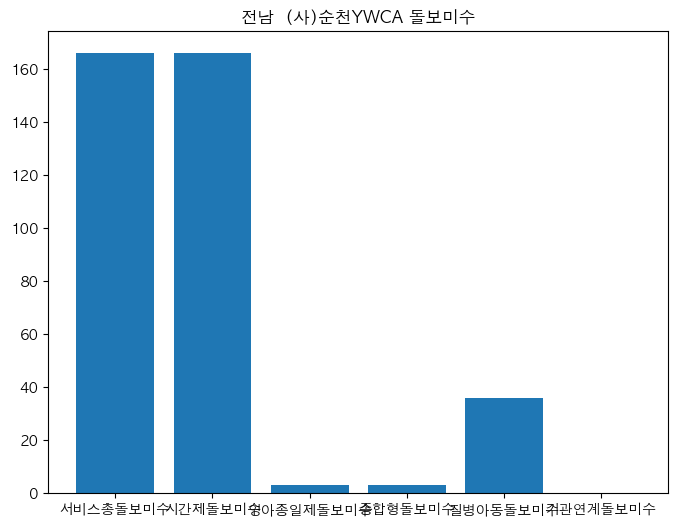

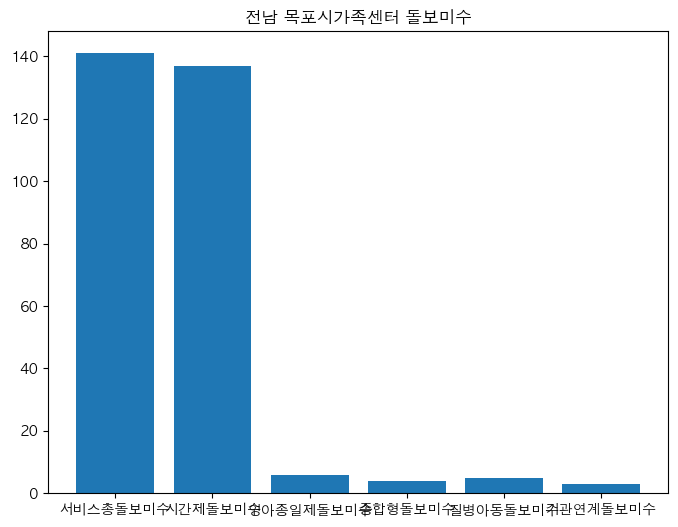

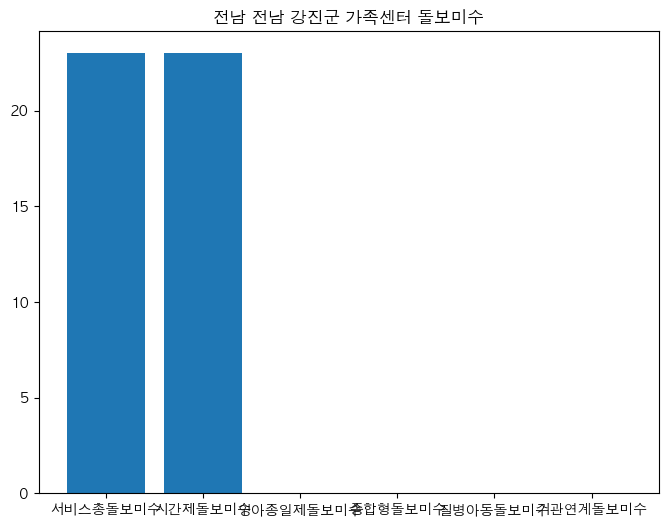

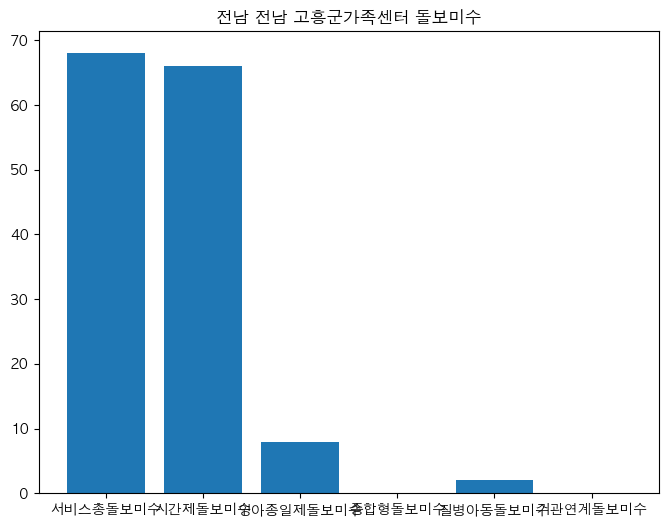

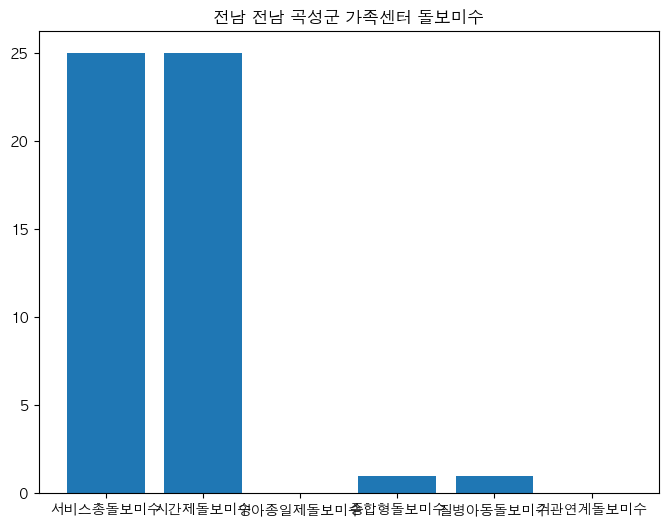

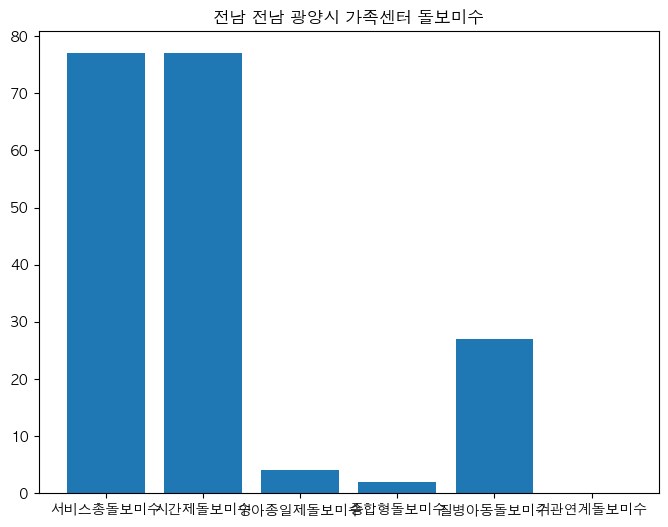

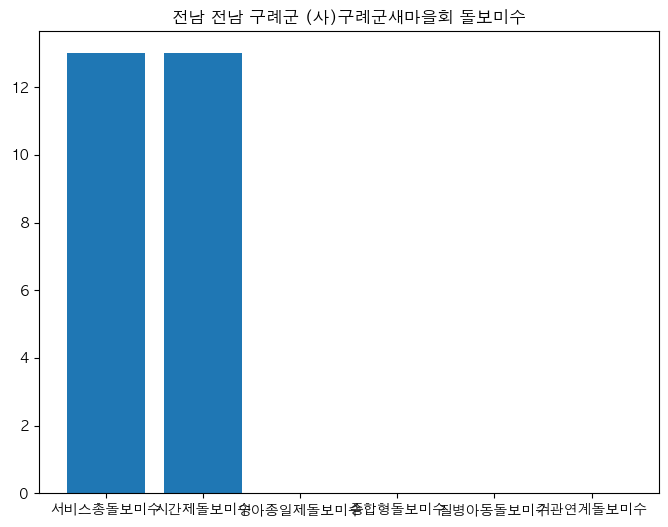

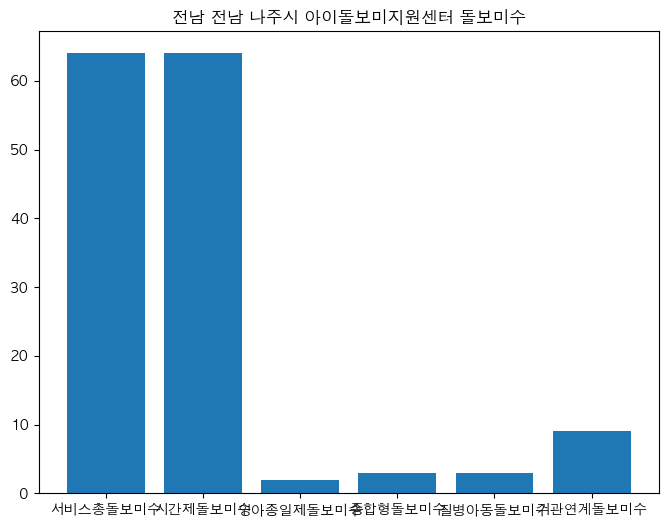

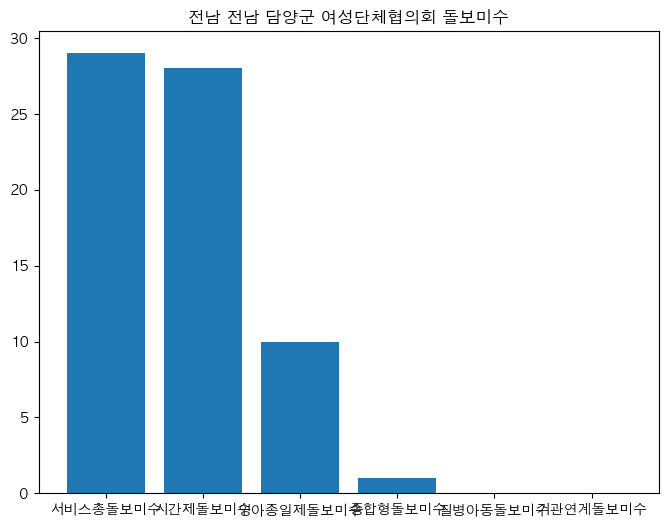

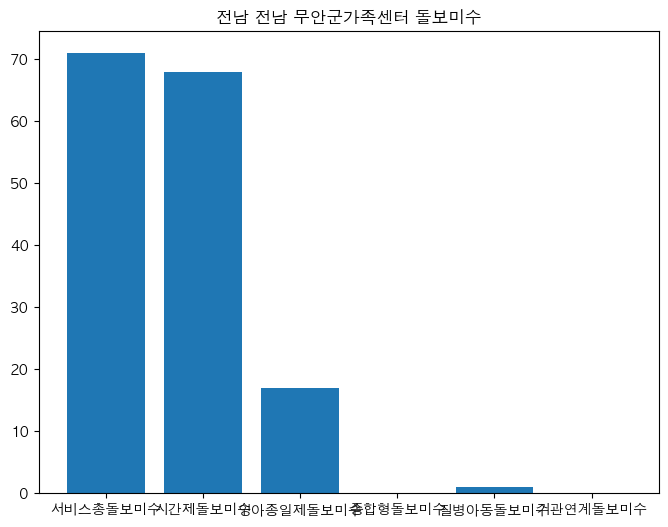

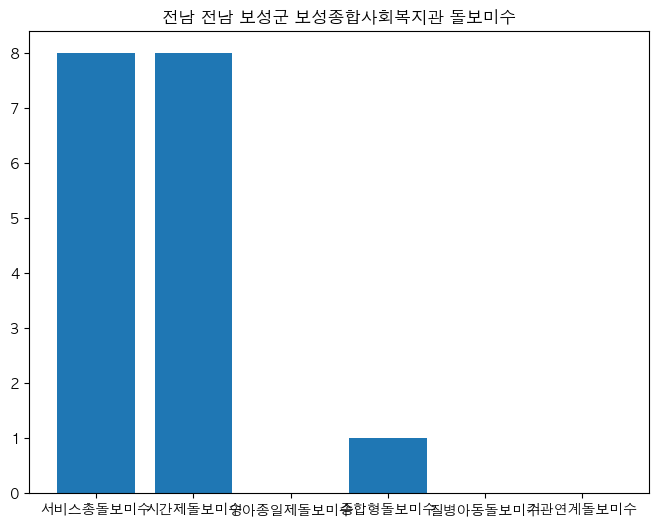

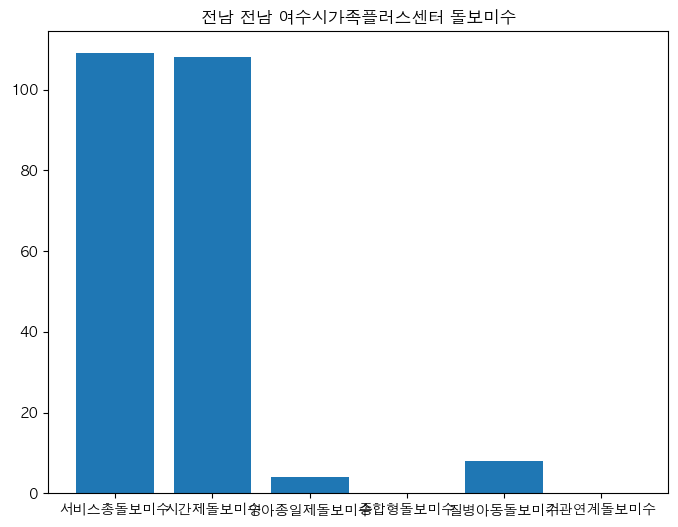

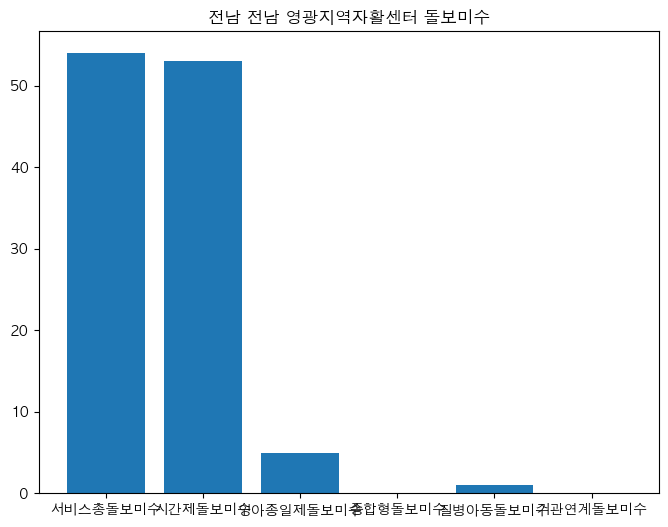

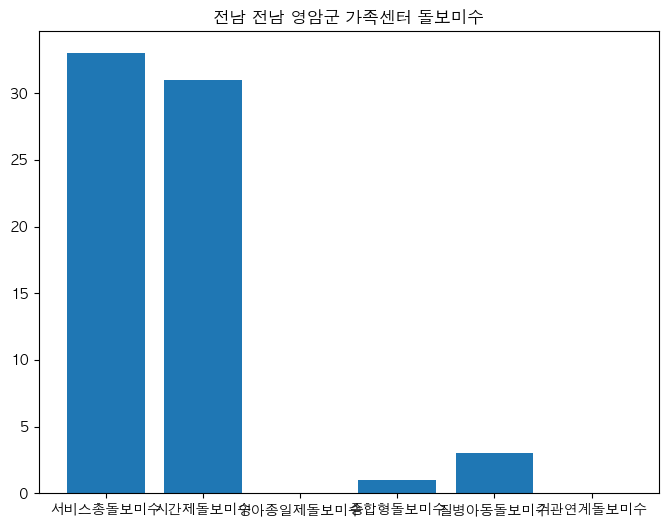

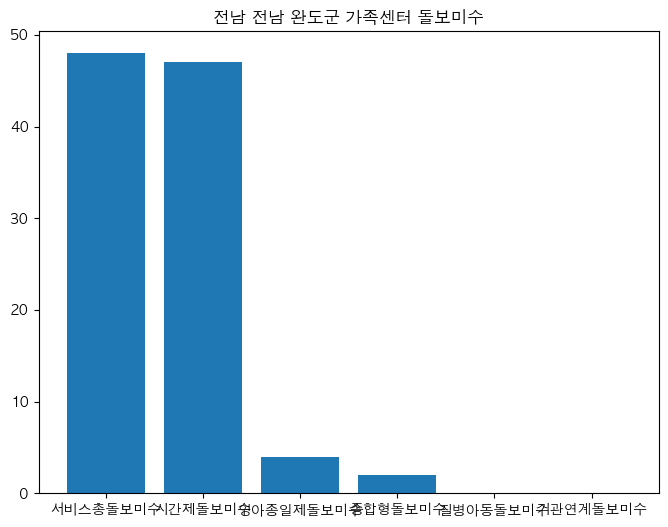

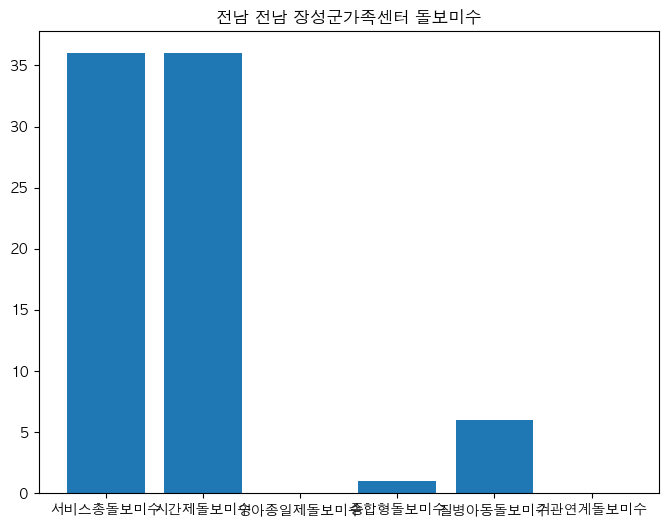

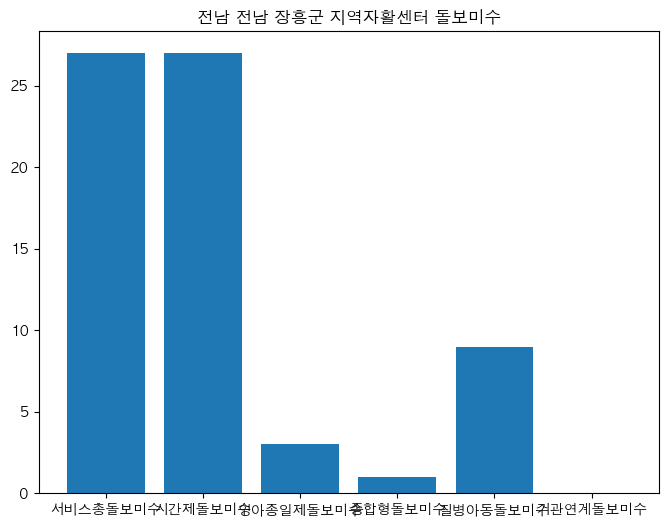

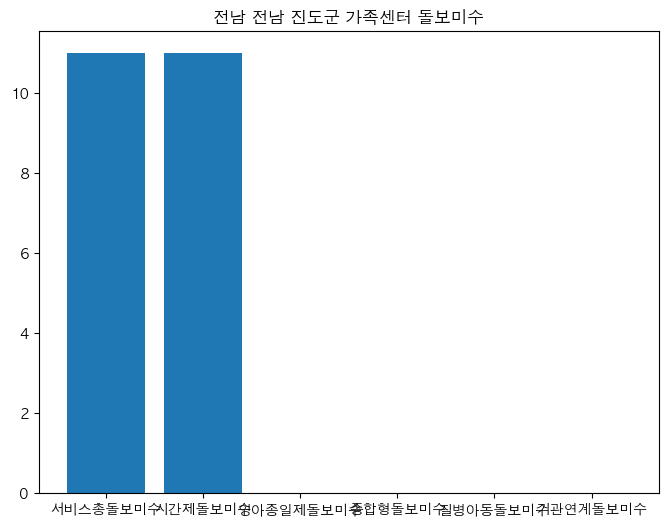

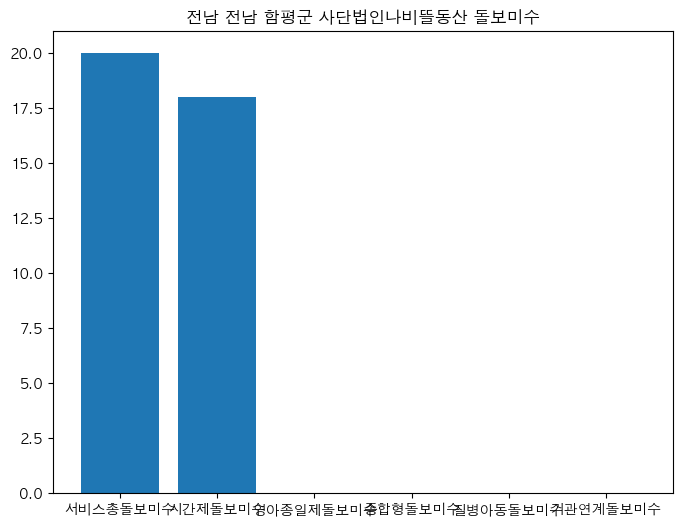

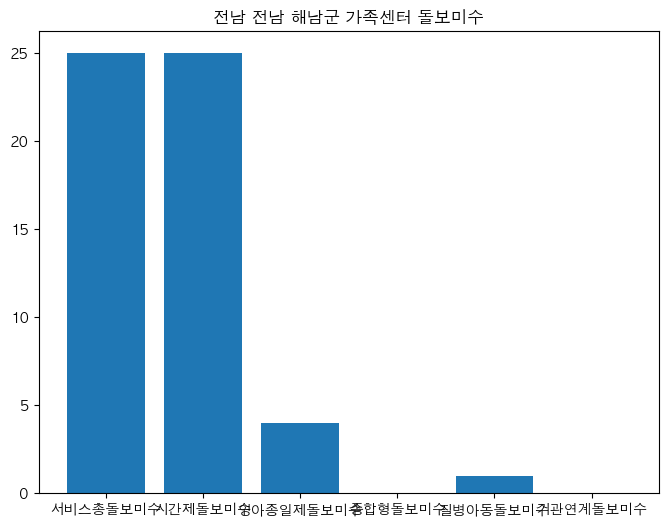

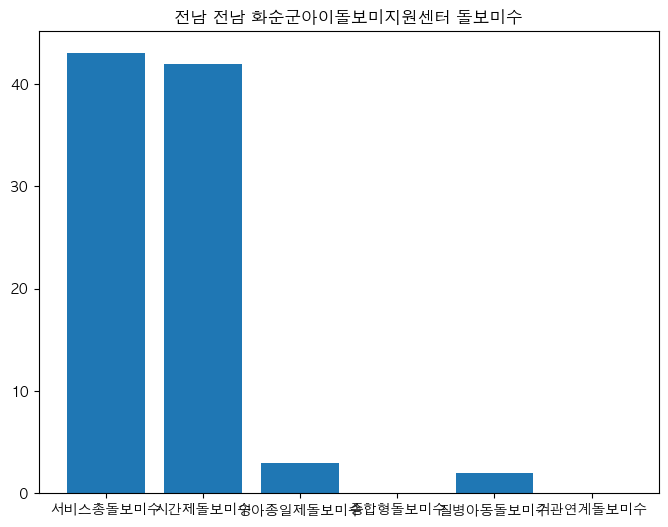

In [20]:
for i in range(len(서비스별_전남_지사배열)):
    #print(서비스별_전남_지사배열[i])
    a = 서비스별[서비스별['아이돌봄기관명'] == 서비스별_전남_지사배열[i]]
    data_to_plot = a.tail(1).iloc[:,5:11]

    # 막대그래프 생성
    fig, ax = plt.subplots(figsize=(8, 6))

    # x축 레이블 설정
    x_labels = data_to_plot.columns

    # 막대그래프 그리기
    ax.bar(x_labels, data_to_plot.iloc[0])
    ax.set_title(f'전남 {서비스별_전남_지사배열[i]} 돌보미수')
    plt.show()

In [21]:
서비스별_서울시 = 서비스별[서비스별['상위아이돌봄기관명'] == '서울특별시 광역거점']

In [22]:
서비스별_서울시

,기준연월,아이돌봄기관번호,아이돌봄기관명,상위아이돌봄기관번호,상위아이돌봄기관명,서비스총돌보미수,시간제돌보미수,영아종일제돌보미수,종합형돌보미수,질병아동돌보미수,기관연계돌보미수,데이터기준일자
89,202001,C0298,노원구가족센터,C0491,서울특별시 광역거점,123,117,8,0,3,4,20240611
120,202001,C0477,서대문구아이돌봄지원센터,C0491,서울특별시 광역거점,138,128,19,0,4,21,20240611
121,202001,C0290,서울 강남구 가족센터,C0491,서울특별시 광역거점,158,126,39,16,3,8,20240611
122,202001,C0291,서울 강동구 가족센터,C0491,서울특별시 광역거점,186,171,27,3,11,0,20240611
123,202001,C0292,서울 강북구 가족센터,C0491,서울특별시 광역거점,102,101,7,0,3,0,20240611
...,...,...,...,...,...,...,...,...,...,...,...,...
11686,202404,C0308,서울 은평구 가족센터,C0491,서울특별시 광역거점,160,159,15,12,4,6,20240611
11687,202404,C0309,서울 종로구 건강가정지원센터,C0491,서울특별시 광역거점,88,75,5,12,2,2,20240611
11688,202404,C0310,서울 중구 가족센터,C0491,서울특별시 광역거점,85,81,10,5,7,3,20240611
11689,202404,C0311,서울 중랑구 비전공유 협동조합,C0491,서울특별시 광역거점,163,150,42,1,8,0,20240611


In [23]:
서비스별_서울시_지사배열 = 서비스별_서울시['아이돌봄기관명'].unique()

In [24]:
서비스별_서울시_지사배열

array(['노원구가족센터', '서대문구아이돌봄지원센터', '서울 강남구 가족센터', '서울 강동구 가족센터',
       '서울 강북구 가족센터', '서울 강서구 건강가정지원센터', '서울 관악구 가족센터', '서울 광진구 건강가정지원센터',
       '서울 구로구 가족센터', '서울 금천구 건강가정지원센터', '서울 도봉구가족센터', '서울 동대문구 건강가정지원센터',
       '서울 동작구 아이돌봄지원사업', '서울 마포구 가족센터', '서울 서초구 가족센터', '서울 성동구가족센터',
       '서울 성북구가족센터', '서울 송파구가족센터_아이돌봄지원사업', '서울 양천구 건강가정지원센터',
       '서울 용산구 가족센터', '서울 은평구 가족센터', '서울 종로구 건강가정지원센터', '서울 중구 가족센터',
       '서울 중랑구 비전공유 협동조합', '영등포구가족센터'], dtype=object)

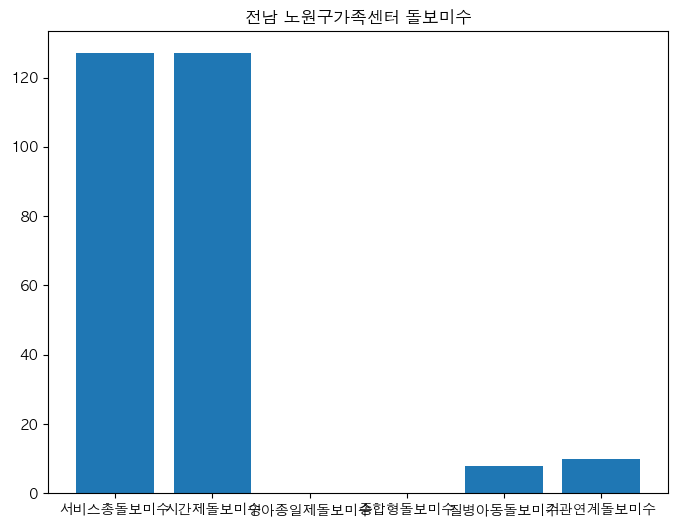

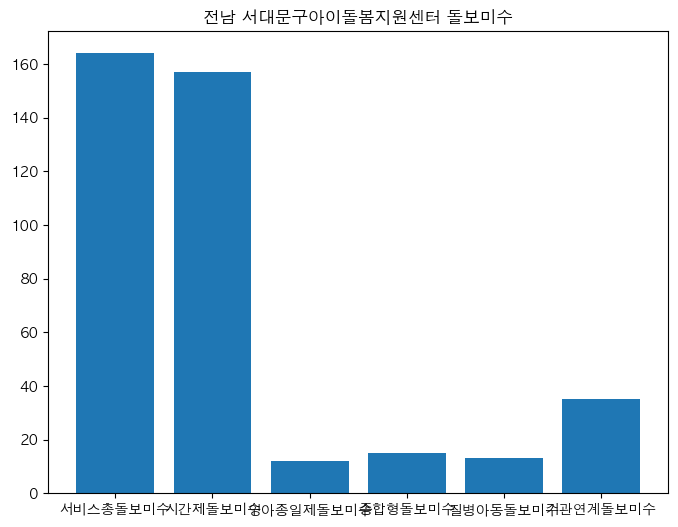

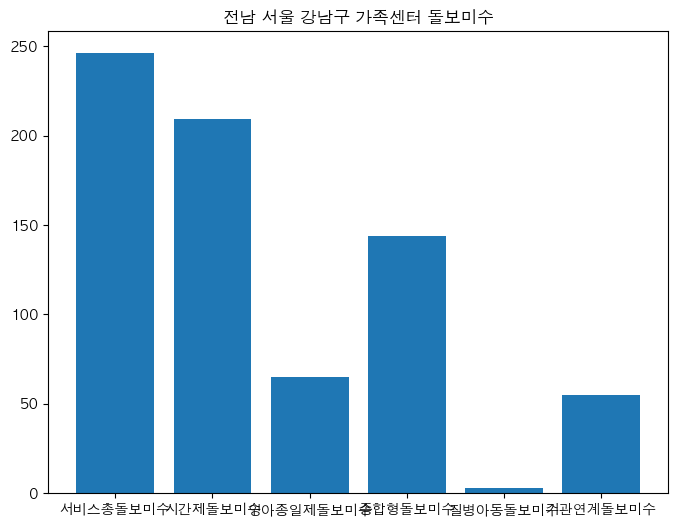

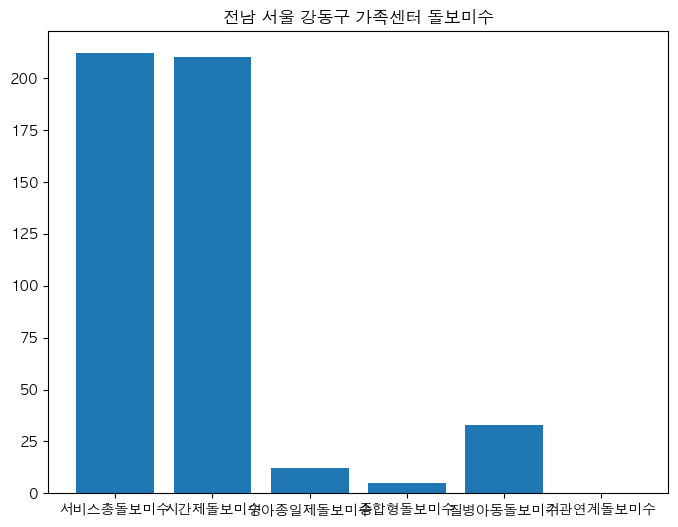

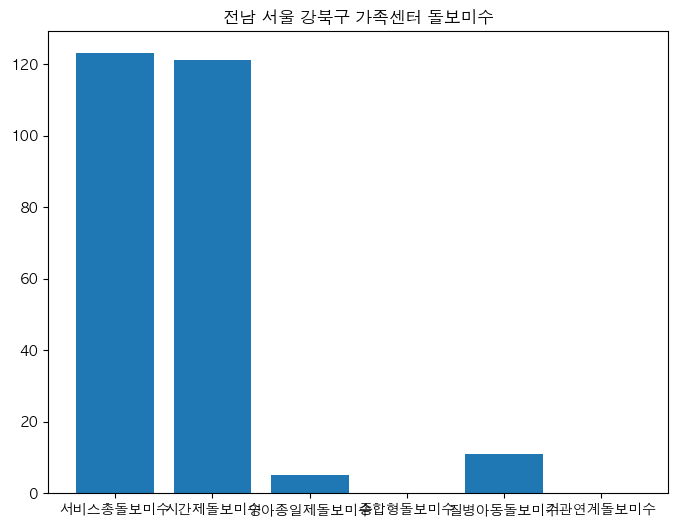

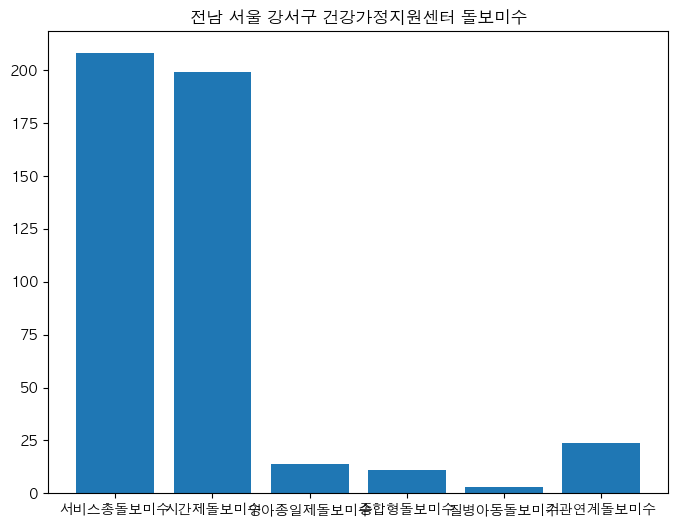

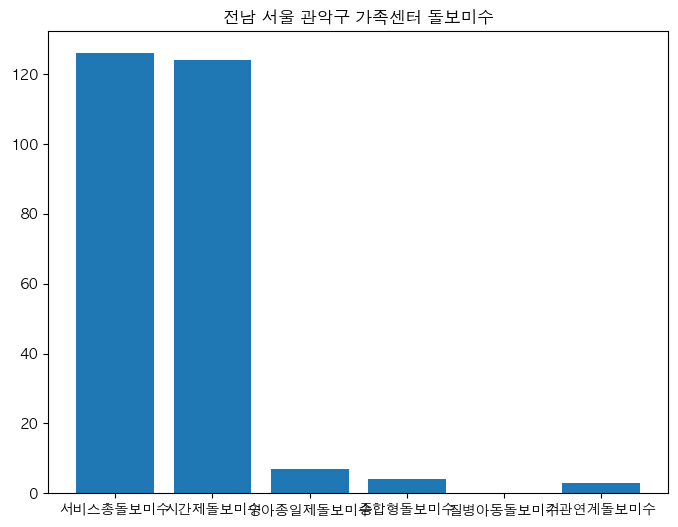

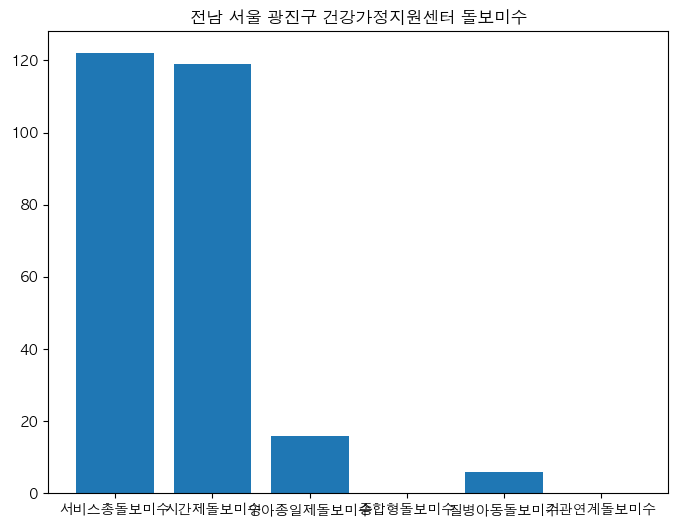

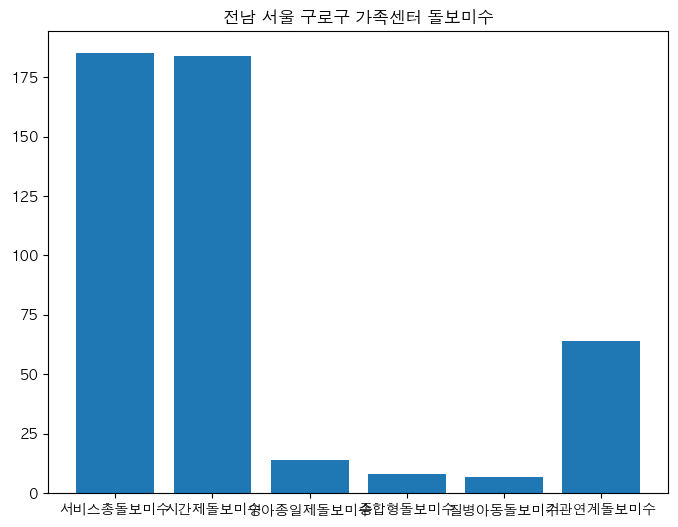

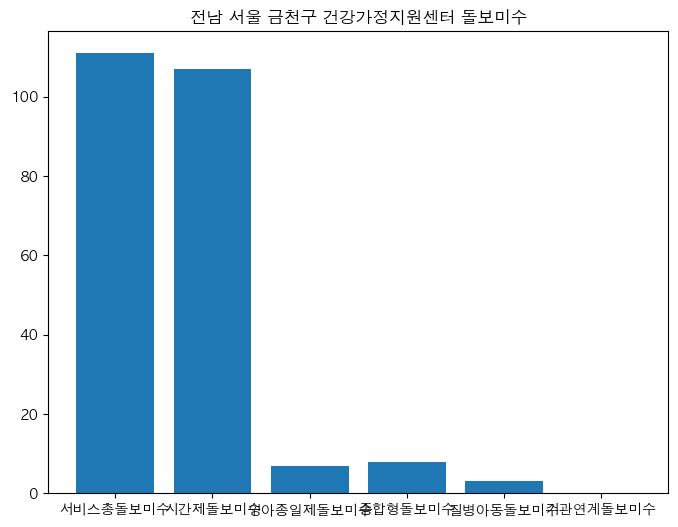

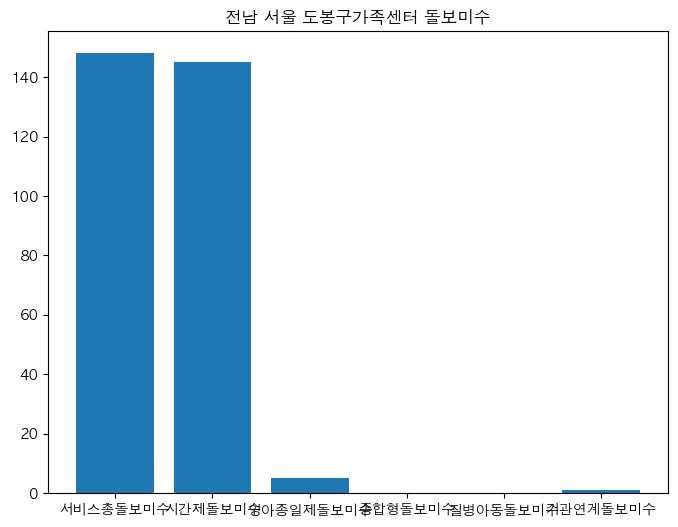

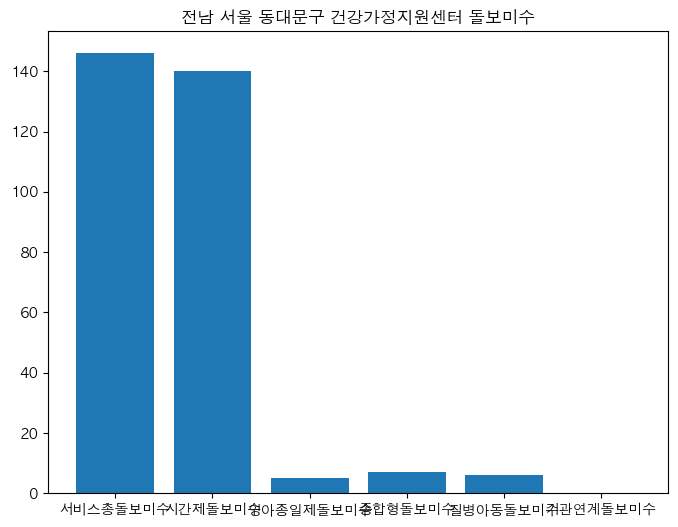

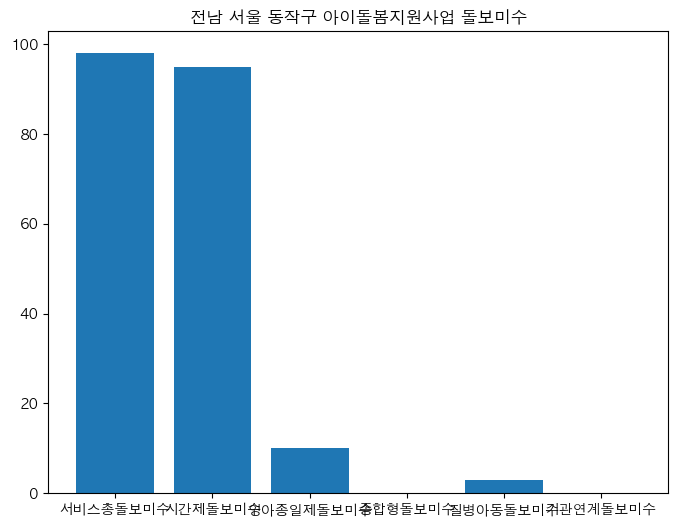

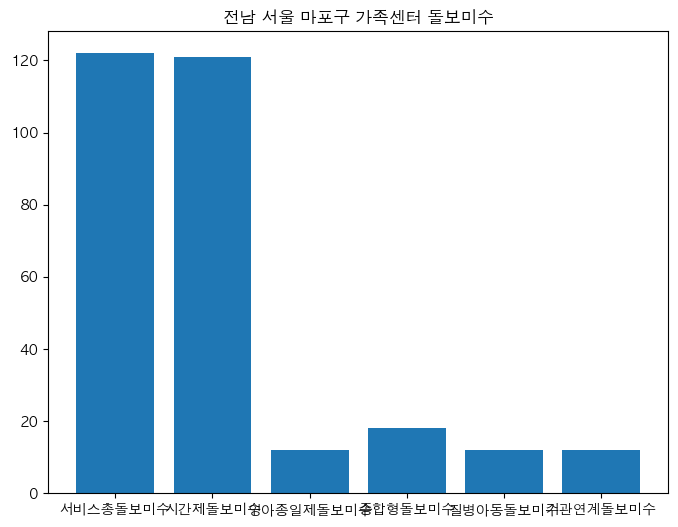

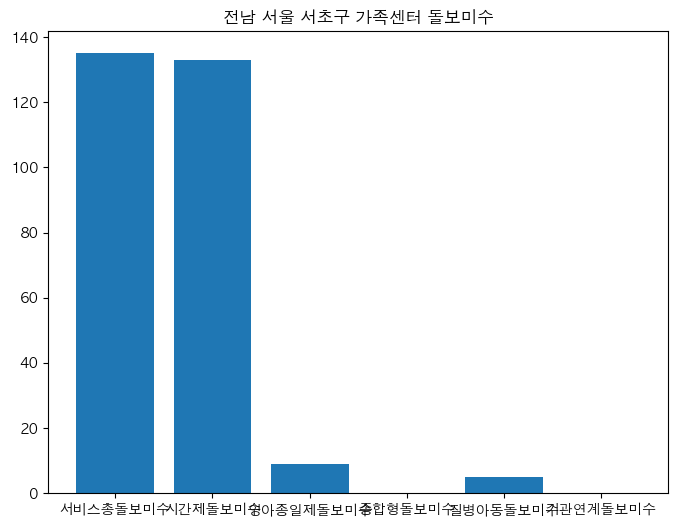

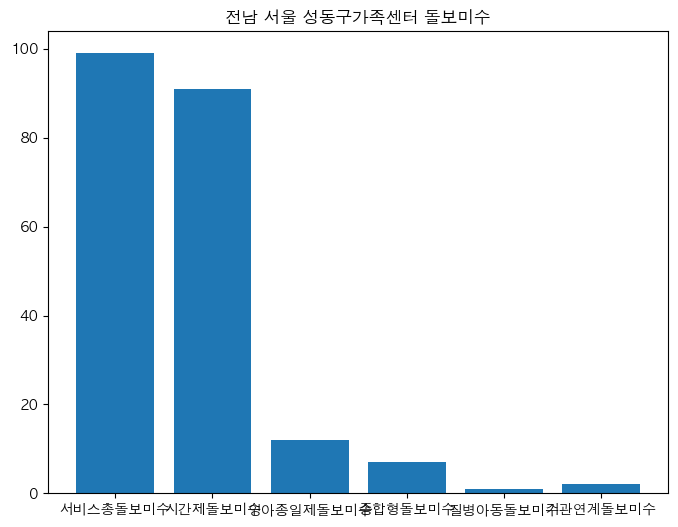

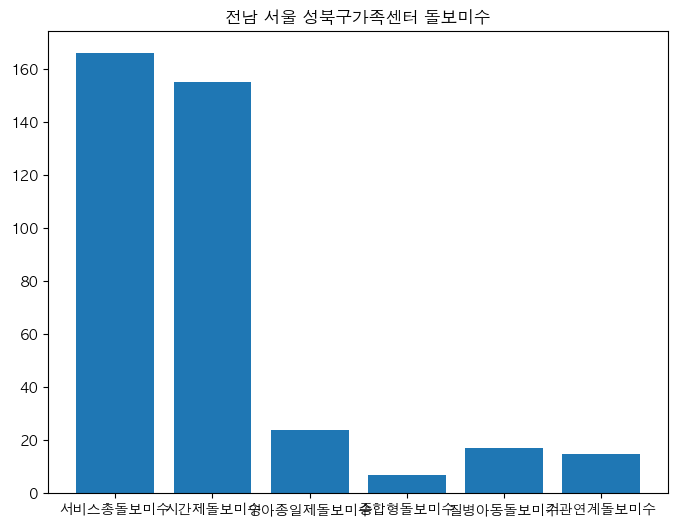

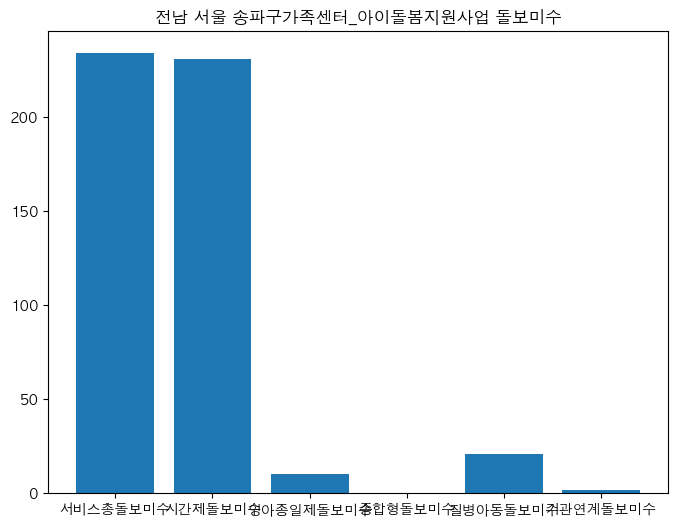

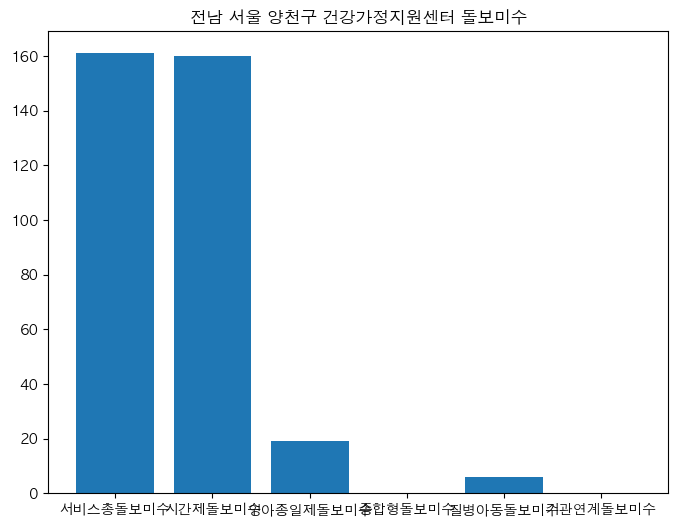

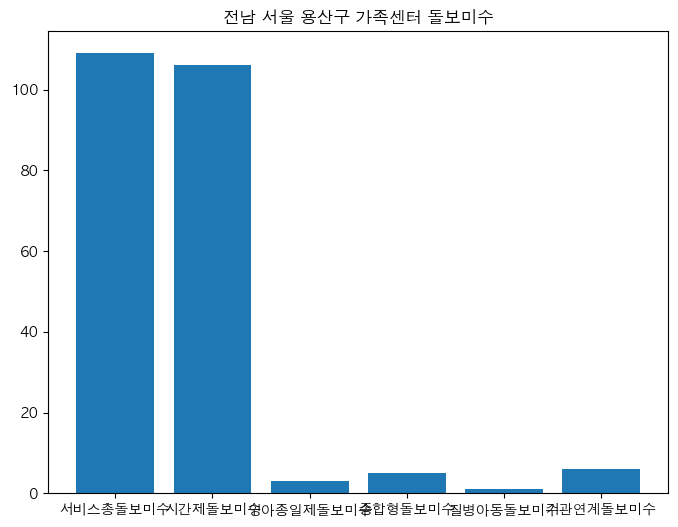

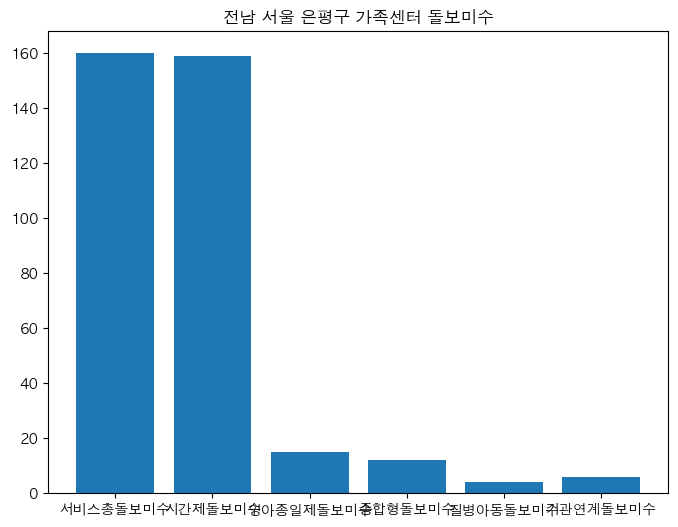

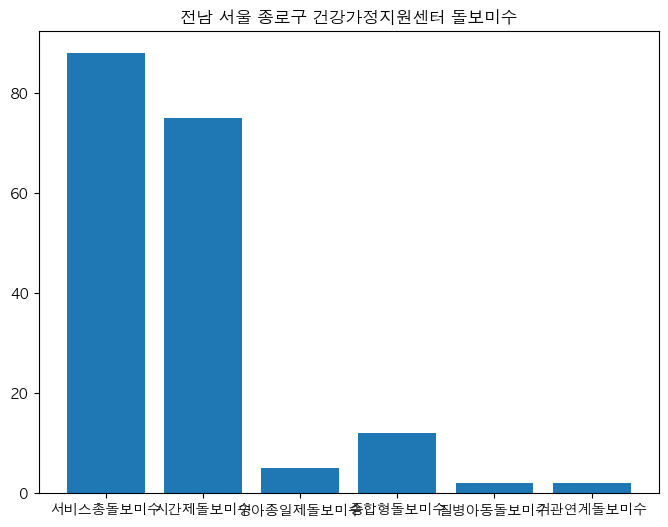

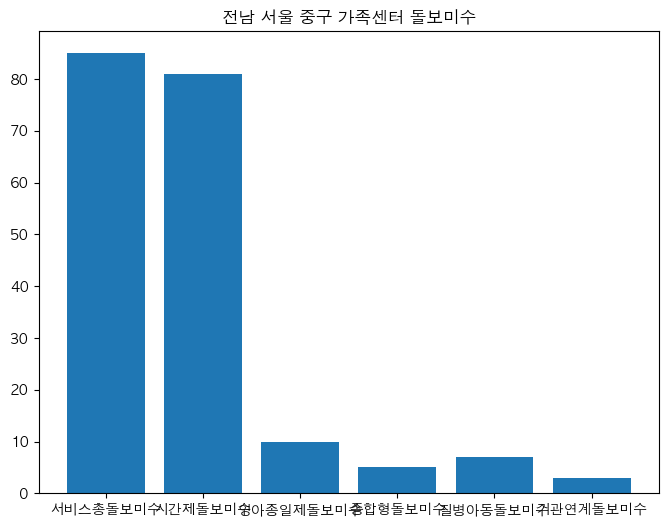

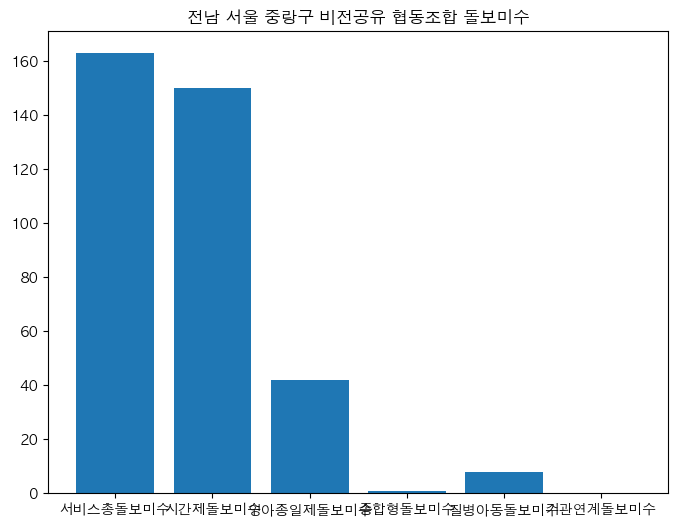

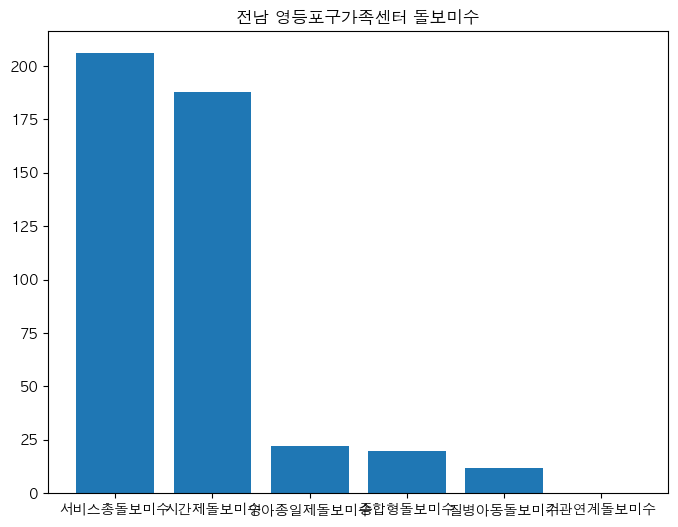

In [25]:
for i in range(len(서비스별_서울시_지사배열)):
    #print(서비스별_전남_지사배열[i])
    a = 서비스별[서비스별['아이돌봄기관명'] == 서비스별_서울시_지사배열[i]]
    data_to_plot = a.tail(1).iloc[:,5:11]

    # 막대그래프 생성
    fig, ax = plt.subplots(figsize=(8, 6))

    # x축 레이블 설정
    x_labels = data_to_plot.columns

    # 막대그래프 그리기
    ax.bar(x_labels, data_to_plot.iloc[0])
    ax.set_title(f'전남 {서비스별_서울시_지사배열[i]} 돌보미수')
    plt.show()

In [51]:
월별가정실적현황 = pd.read_excel("./데이터파일/7.여성가족부_아이돌봄 월별가정실적현황 정보 서비스_20240722.xlsx")
월별신청현황 = pd.read_excel("./데이터파일/8.여성가족부_아이돌봄 월별신청현황 정보 서비스_20240612.xlsx")
월별신청현황_시간대별 = pd.read_excel("./데이터파일/9.여성가족부_아이돌봄 월별신청현황-시간대별 정보 서비스_20240612.xlsx")
월별신청현황_연령대별 = pd.read_excel("./데이터파일/10.여성가족부_아이돌봄 월별신청현황-연령대별 정보 서비스_20240612.xlsx")
월별신청현황_연령소득기준별 = pd.read_excel("./데이터파일/11.여성가족부_아이돌봄 월별신청현황-연령소득기준별 정보서비스_20240612.xlsx")
월별아동실적현황 = pd.read_excel("./데이터파일/12.여성가족부_아이돌봄 월별아동실적현황 정보 서비스_20240612.xlsx")
회원현황 = pd.read_excel("./데이터파일/13.여성가족부_아이돌봄 회원현황 정보 서비스_20240611.xlsx")

In [52]:
월별가정실적현황.columns

Index(['기준연월', '아이돌봄기관번호', '아이돌봄기관명', '질병서비스여부', '돌봄구분명', '서비스다양화명',
       '상위아이돌봄기관번호', '상위아이돌봄기관명', '연계가정수', '연계가형가정수', '연계나형가정수', '연계다형가정수',
       '연계라형가정수', '신청가정수', '신청가형가정수', '신청나형가정수', '신청다형가정수', '신청라형가정수',
       '신규연계가정수', '신규연계가형가정수', '신규연계나형가정수', '신규연계다형가정수', '신규연계라형가정수',
       '데이터기준일자'],
      dtype='object')

In [53]:
print("아이돌봄기관번호 갯수 : ",len(월별가정실적현황['아이돌봄기관번호'].unique()))
print("아이돌봄기관명 갯수 : ",len(월별가정실적현황['아이돌봄기관명'].unique()))
print("상위아이돌봄기관번호 갯수 : ",len(월별가정실적현황['상위아이돌봄기관번호'].unique()))

아이돌봄기관번호 갯수 :  228
아이돌봄기관명 갯수 :  228
상위아이돌봄기관번호 갯수 :  17


## 아이돌봄기관번호 , 아이돌봄기관명 가 같음(기관명,기관번호는 같이따라감) 

In [54]:
월별가정실적현황 = 월별가정실적현황.drop(columns=["데이터기준일자","아이돌봄기관번호"])

In [81]:
월별가정실적현황['돌봄구분명'].unique()

array(['시간제', '종일제'], dtype=object)

In [83]:
print("시간제 :",len(월별가정실적현황[월별가정실적현황['돌봄구분명'] == '시간제']))
print("종일제 :", len(월별가정실적현황) - len(월별가정실적현황[월별가정실적현황['돌봄구분명'] == '시간제']))


시간제 : 24496
종일제 : 10245


In [105]:
월별가정실적현황['신규연계나형가정수']

0        0
1        0
2        0
3        0
4        0
        ..
34736    0
34737    0
34738    4
34739    0
34740    0
Name: 신규연계나형가정수, Length: 34741, dtype: int64

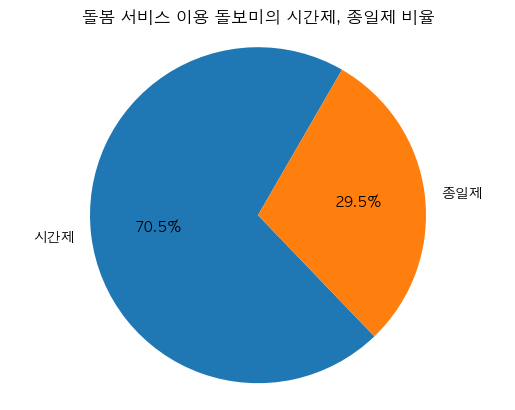

In [97]:
# 데이터 준비
#labels = ['Apple', 'Banana', 'Cherry', 'Date']
sizes = [len(월별가정실적현황[월별가정실적현황['돌봄구분명'] == '시간제']),len(월별가정실적현황) - len(월별가정실적현황[월별가정실적현황['돌봄구분명'] == '시간제'])]
labe = ['시간제','종일제']
# 파이차트 그리기
plt.pie(sizes,labels=labe, autopct='%1.1f%%', startangle=60)
plt.title("돌봄 서비스 이용 돌보미의 시간제, 종일제 비율")
# 그래프 비율을 같게 유지 (원형 차트)
plt.axis('equal')

# 그래프 보여주기
plt.show()

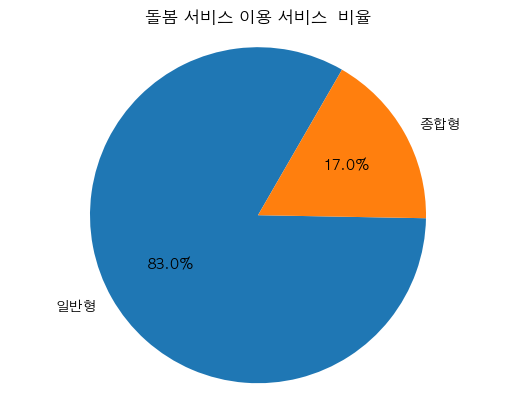

In [102]:
# 데이터 준비
#labels = ['Apple', 'Banana', 'Cherry', 'Date']
sizes = [len(월별가정실적현황[월별가정실적현황['서비스다양화명'] == '일반형']),len(월별가정실적현황) - len(월별가정실적현황[월별가정실적현황['서비스다양화명'] == '일반형'])]
labe = ['일반형','종합형']
# 파이차트 그리기
plt.pie(sizes,labels=labe, autopct='%1.1f%%', startangle=60)
plt.title("돌봄 서비스 이용 서비스  비율")
# 그래프 비율을 같게 유지 (원형 차트)
plt.axis('equal')

# 그래프 보여주기
plt.show()

In [109]:
월별가정실적현황.iloc[:,7:12]

,연계가정수,연계가형가정수,연계나형가정수,연계다형가정수,연계라형가정수
0,264,141,67,3,53
1,17,9,6,1,1
2,8,4,2,1,1
3,188,122,38,5,23
4,25,15,6,0,4
...,...,...,...,...,...
34736,2,2,0,0,0
34737,12,6,5,1,0
34738,309,157,95,20,37
34739,5,3,2,0,0
